In [1]:
import os, sys, time, copy, random, argparse
import traceback
import numpy as np
import cv2
import imutils
from collections import deque
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from MiscUtils import mock_hist_data

In [5]:
from Methods import imgToPx, pxToHist

In [8]:
rect = ((100,100),(200,200))
my_img = img[0]

In [9]:
px_data = imgToPx(my_img, rect) ##frame should be img
hist_data = pxToHist(px_data)

In [10]:
hist_data[3]

(array([   27,   155,  2467, 20539, 22215, 16656, 17900, 23436, 23724,
        19087, 12291,  4891,  3017,  1031,   819,   723,   820,   727,
          769,   293,   133,   197,   582,   658,   822,   922,  1353,
         1029,  1506, 25492]),
 array([   0. ,    8.5,   17. ,   25.5,   34. ,   42.5,   51. ,   59.5,
          68. ,   76.5,   85. ,   93.5,  102. ,  110.5,  119. ,  127.5,
         136. ,  144.5,  153. ,  161.5,  170. ,  178.5,  187. ,  195.5,
         204. ,  212.5,  221. ,  229.5,  238. ,  246.5,  255. ]))

In [11]:
#Verify pix count
backg_hist_colorb = hist_data[3]
hist_n = backg_hist_colorb[0]
px_num = sum(hist_n)
print px_num
print px_num == (640*480 - 100*100)   #possible bug in px_remove_crop

rect_hist_colorb = hist_data[0]
hist_n = rect_hist_colorb[0]
px_num = sum(hist_n)
print px_num
print px_num == 100*100

204281
False
10000
True


In [12]:
#backg is missing this many pxs
(640*480 - 100*100) - 204281

92919

In [13]:
len(px_data)

6

6
0   0
0   1
0   2
1   0
1   1
1   2


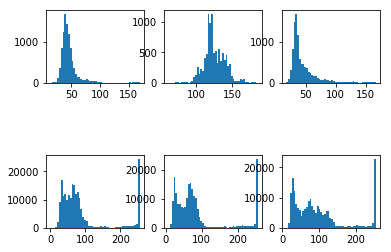

In [14]:
def multi_hist(l_hists = [], full = True, bins = 50 ):
    
    h,w = (2,3) if full else (1,3) 
    f ,arrax = plt.subplots(h,w)
    for i in range(h*w):
        hi, wi = i / 3, i % 3
        print hi, ' ', wi
        if full:
            arrax[hi][wi].hist(l_hists[i], bins = bins)
        else:
            arrax[i].hist(l_hists[i], bins = bins)
        #arrax[i].set_title('color : '  + str(clr))
    f.subplots_adjust(hspace=1)
    plt.show()

print len(px_data)
multi_hist(l_hists = px_data, full = True)

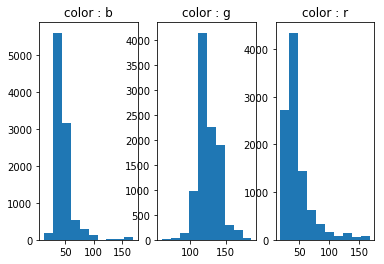

In [45]:
multi_hist(l_hists = px_data)

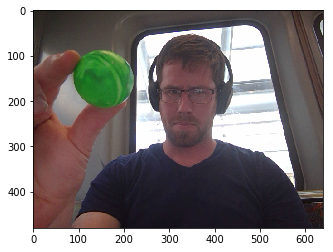

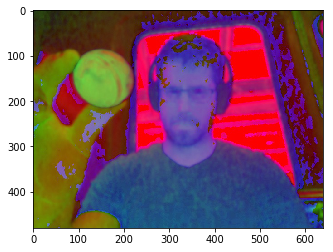

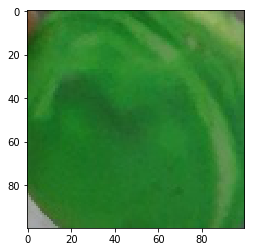

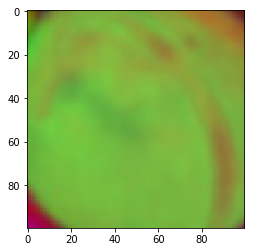

In [7]:
dir_path = "data/write/july/imgs17/"
ext = ".jpg"
n = 1
img = []
for pind in xrange(1,n+1):
    for ptype in ['img', 'img_t', 'rect', 'rect_t']:
        pic_and_path = dir_path
        pic_and_path += ptype
        pic_and_path += str(pind)
        pic_and_path += ext
        _img =  cv2.imread(pic_and_path)
        plt.imshow(cv2.cvtColor(_img, cv2.COLOR_BGR2RGB))
        #plt.imshow(_img)
        plt.show()
        img.append(_img)

In [20]:
%load_ext autoreload
%autoreload 2
from MiscUtils import mock_hist_data

In [32]:
data = mock_hist_data()
data

[[-2.5223418741874042,
  53.48305406032398,
  -5.1127939734670846,
  -29.11195622330483,
  25.504598018116454,
  29.610769881399687,
  46.080653826421262,
  8.9548120859694507,
  34.330225959593271,
  107.13540020106807,
  46.742266796642632,
  43.730318445127374,
  18.911218126014511,
  69.095364816457717,
  20.453099688434847,
  28.809266314249747,
  1.8513009095910178,
  65.297664432798101,
  11.461584979128862,
  -37.308682730002921,
  102.2327688059124,
  15.892052698363116,
  0.39254614031571577,
  94.398640433335814,
  49.392182918156465,
  -4.9492135086209927,
  29.861559981989306,
  -9.1329516593624334,
  -38.664718286160806,
  -26.79523144137486,
  16.368335271213716,
  -2.0105027967960396,
  39.721130746659327,
  39.196446855620678,
  27.537484327876737,
  22.280195125945948,
  84.552991094946094,
  117.94814307312612,
  55.799178248437528,
  -22.761730662258159,
  53.127739595163256,
  -61.020054177820882,
  49.019874270502918,
  118.08938493578749,
  54.355599453726512,
  

In [33]:
inp_bins = 30
n, bins = np.histogram(data[0], inp_bins)

In [34]:
print bins

[ -61.02005418  -54.78051758  -48.54098097  -42.30144437  -36.06190777
  -29.82237117  -23.58283457  -17.34329796  -11.10376136   -4.86422476
    1.37531184    7.61484844   13.85438504   20.09392165   26.33345825
   32.57299485   38.81253145   45.05206805   51.29160466   57.53114126
   63.77067786   70.01021446   76.24975106   82.48928767   88.72882427
   94.96836087  101.20789747  107.44743407  113.68697068  119.92650728
  126.16604388]


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,  21.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ -61.02005418,  -54.78051758,  -48.54098097,  -42.30144437,
         -36.06190777,  -29.82237117,  -23.58283457,  -17.34329796,
         -11.10376136,   -4.86422476,    1.37531184,    7.61484844,
          13.85438504,   20.09392165,   26.33345825,   32.57299485,
          38.81253145,   45.05206805,   51.29160466,   57.53114126,
          63.77067786,   70.01021446,   76.24975106,   82.48928767,
          88.72882427,   94.96836087,  101.20789747,  107.44743407,
         113.68697068,  119.92650728,  126.16604388]),
 <a list of 30 Patch objects>)

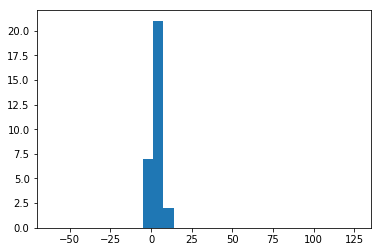

In [35]:
plt.hist(x = n ,bins = bins)